In [4]:
print("Hello World")

Hello World


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# define training sets
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")

x_train: [1. 2.]
y_train: [300. 500.]


In [8]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"x_train size: {x_train.shape[0]}")

x_train.shape: (2,)
x_train size: 2


In [9]:
# Denote training sample by ith x^(i), y^(i)
i = 0
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y(({i}) = {x_i}, {y_i}")

(x^(0), y((0) = 1.0, 300.0


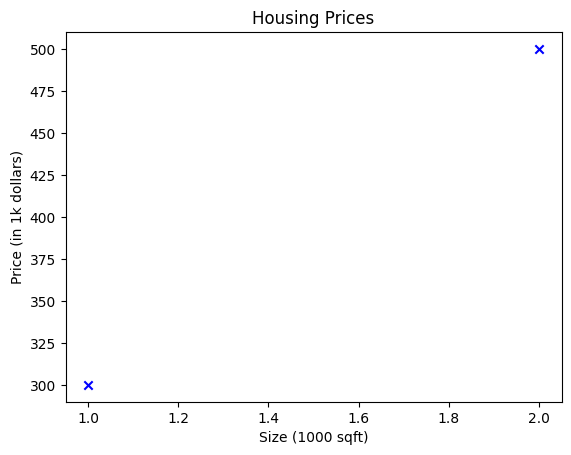

In [11]:
# Plot data
plt.scatter(x_train, y_train, marker='x', c='b')
plt.title("Housing Prices")
plt.ylabel("Price (in 1k dollars)")
plt.xlabel("Size (1000 sqft)")
plt.show()

In [10]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


In [6]:
# Define Model Computation y = wx + b
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    
    return f_wb

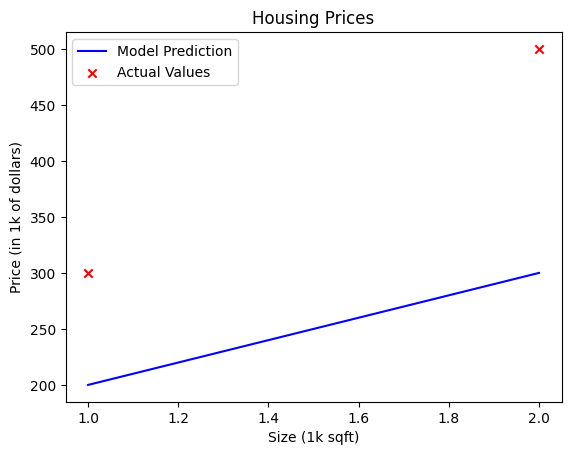

In [13]:
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot model prediction line regression
plt.plot(x_train, tmp_f_wb, c='b', label='Model Prediction')

# Plot the actual data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

plt.title("Housing Prices")
plt.ylabel("Price (in 1k of dollars)")
plt.xlabel("Size (1k sqft)")
plt.legend()
plt.show()

In [4]:
import math, copy

In [3]:
# Gradient descent: J(w, b) = 1/2m sum(f_wb(x^(i)) - y^(i))^2
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost
    return total_cost

In [2]:
# Compute Gradient
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [1]:
def gradient_descent(x, y, start_w, start_b, alpha, iters_no):
    cost_hist = []
    wb_hist = []
    w = start_w
    b = start_b

    for i in range(iters_no):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # step w, b
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            cost_hist.append(compute_cost(x, y, w, b))
            wb_hist.append([w,b])

    return w, b, cost_hist, wb_hist



In [11]:
w_init = 0
b_init = 0

iters = 10000
tmp_alpha = 1.0e-2

# sample data
x_train = np.array([2.13, 3.78, 4.21, 0.96, 7.32, 1.45, 6.01, 8.73, 5.84, 9.28, 2.67, 8.15, 4.89, 3.24, 7.66, 5.57, 2.89, 0.77, 4.45, 1.13, 6.98, 1.91, 9.72, 3.32, 7.88, 8.57, 3.99, 9.45, 1.67, 4.77, 5.21, 0.64, 5.39, 8.02, 7.23, 6.67, 6.32, 3.01, 4.13, 0.88, 2.45, 8.89, 6.45, 3.57, 2.21, 7.12, 4.98, 5.88, 9.01])
y_train = np.array([11.34, 16.84, 18.61, 7.91, 24.68, 10.26, 22.12, 29.01, 21.35, 30.89, 11.46, 27.57, 18.08, 14.01, 26.49, 19.36, 13.11, 7.56, 17.82, 9.49, 24.54, 11.18, 31.25, 15.56, 26.19, 28.43, 16.77, 29.32, 10.55, 20.16, 19.21, 7.79, 20.57, 27.07, 24.05, 21.96, 21.22, 15.57, 18.42, 8.53, 12.84, 29.33, 22.35, 14.82, 11.49, 25.88, 17.39, 21.07, 29.33])


w_final, b_final, cost_hist, wb_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iters)

print(f"(w,b) calculated by gradient descent: ({w_final}, {b_final})")

(w,b) calculated by gradient descent: (2.5772400436501135, 6.184937778886169)


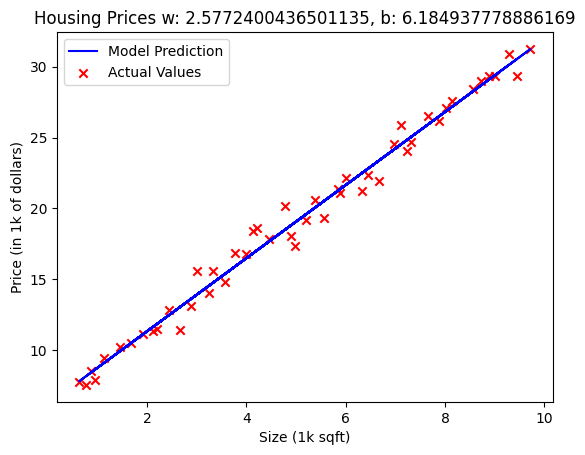

In [19]:
tmp_f_wb = compute_model_output(x_train, w_final, b_final)

# Plot model prediction line regression
plt.plot(x_train, tmp_f_wb, c='b', label='Model Prediction')

# Plot the actual data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

plt.title(f"Housing Prices w: {w_final}, b: {b_final}")
plt.ylabel("Price (in 1k of dollars)")
plt.xlabel("Size (1k sqft)")
plt.legend()
plt.show()

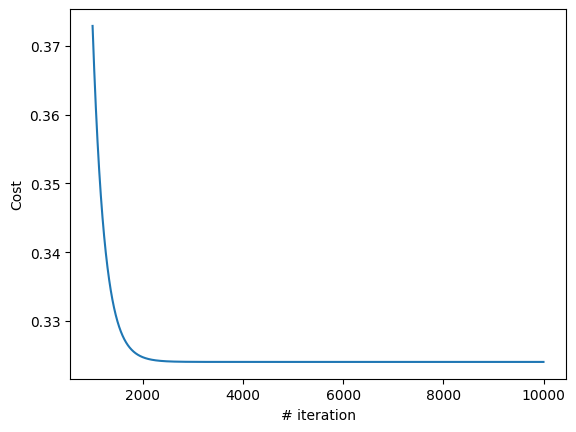

In [16]:
plt.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
plt.xlabel("# iteration")
plt.ylabel("Cost")
plt.show()

In [20]:
def predict(X, w, b):
    m = X.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(X[i], w) + b

    return f_wb

In [4]:
def compute_cost_mv(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i =  np.dot(X[i], w) + b
        cost += (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [5]:
def compute_gradient_mv(X, y, w, b):
    m, n =  X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [6]:
def gradient_descent_mv(X, y, initial_w, initial_b, alpha, iters_no):
    cost_hist = []
    w = initial_w.copy()
    b = initial_b

    for i in range(iters_no):
        dj_db, dj_dw = compute_gradient_mv(X, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            cost_hist.append(compute_cost_mv(X, y, w, b))

        print(f"w: {w}, b: {b}")

    return w, b, cost_hist

In [7]:
# Multiple Variables Linear Regression
n = 10
# Generate random x values (size in 1k sqft), number of bedrooms, number of bathrooms, and age of the house (in years)
x = np.zeros(shape=(n, 4))
y = np.zeros(n)

for i in range(x.shape[0]):
    x[i] = np.array([np.random.randint(500, 2500), np.random.randint(1, 5), np.random.randint(1, 2), np.random.randint(10, 50)])
    y[i] = np.random.randint(150, 2000)

print(x)
print(y)

[[9.790e+02 1.000e+00 1.000e+00 1.500e+01]
 [1.478e+03 2.000e+00 1.000e+00 2.100e+01]
 [9.590e+02 2.000e+00 1.000e+00 3.100e+01]
 [7.500e+02 3.000e+00 1.000e+00 4.700e+01]
 [1.297e+03 3.000e+00 1.000e+00 2.400e+01]
 [8.600e+02 2.000e+00 1.000e+00 4.700e+01]
 [1.275e+03 1.000e+00 1.000e+00 4.600e+01]
 [1.193e+03 2.000e+00 1.000e+00 4.300e+01]
 [6.150e+02 2.000e+00 1.000e+00 2.800e+01]
 [2.424e+03 4.000e+00 1.000e+00 4.300e+01]]
[ 725. 1247.  761.  152. 1471. 1330.  457.  986. 1537.  998.]


In [14]:
# Initiailize params
start_b = 0
start_w = np.random.rand(4)
print(start_w)

# Gradient descent setting
iters = 1000
alpha = 1.0e-8

w_final, b_final, cost_hist_mv = gradient_descent_mv(x, y, start_w ,start_b, alpha, iters)

[0.27159782 0.97930864 0.65833101 0.31975008]
w: [0.27856119 0.9793224  0.65833732 0.31994749], b: 6.312555961026994e-06
w: [0.28541063 0.97933596 0.65834355 0.32014202], b: 1.2542666703541664e-05
w: [0.292148   0.97934933 0.6583497  0.32033371], b: 1.8691681042044192e-05
w: [0.29877514 0.9793625  0.65835577 0.32052261], b: 2.4760925723993535e-05
w: [0.30529384 0.97937549 0.65836176 0.32070877], b: 3.075170579083135e-05
w: [0.31170589 0.97938829 0.65836768 0.32089223], b: 3.666530493309946e-05
w: [0.31801303 0.97940092 0.65837351 0.32107303], b: 4.2502985839747456e-05
w: [0.32421697 0.97941336 0.65837928 0.32125123], b: 4.826599054172558e-05
w: [0.3303194  0.97942563 0.65838497 0.32142685], b: 5.395554074995623e-05
w: [0.33632199 0.97943772 0.65839058 0.32159995], b: 5.957283818777619e-05
w: [0.34222637 0.97944965 0.65839613 0.32177056], b: 6.511906491794003e-05
w: [0.34803413 0.9794614  0.65840161 0.32193873], b: 7.059538366427353e-05
w: [0.35374688 0.979473   0.65840701 0.32210449], 

X Size m: 10, n: 4
[ 689.00354133 1039.75671415  681.67793152  542.67298641  915.68791057
  618.33000547  906.13373753  848.92971242  440.95255122 1708.55067709]


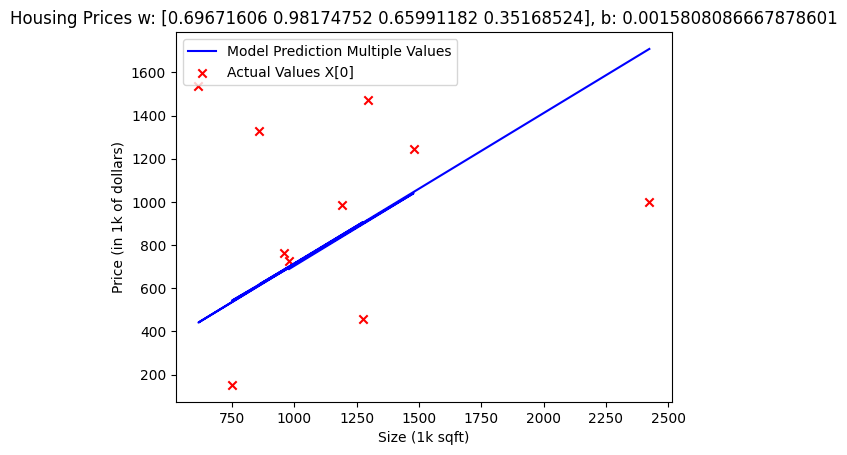

In [15]:
f_wb = predict(x, w_final, b_final)

print(f_wb)

# Plot model prediction line regression
plt.plot(x[: , 0], f_wb, c='b', label='Model Prediction Multiple Values')
plt.scatter(x[:, 0], y, marker='x', c='r', label="Actual Values X[0]")
plt.title(f"Housing Prices w: {w_final}, b: {b_final}")
plt.ylabel("Price (in 1k of dollars)")
plt.xlabel("Size (1k sqft)")
plt.legend()
plt.show()

1000


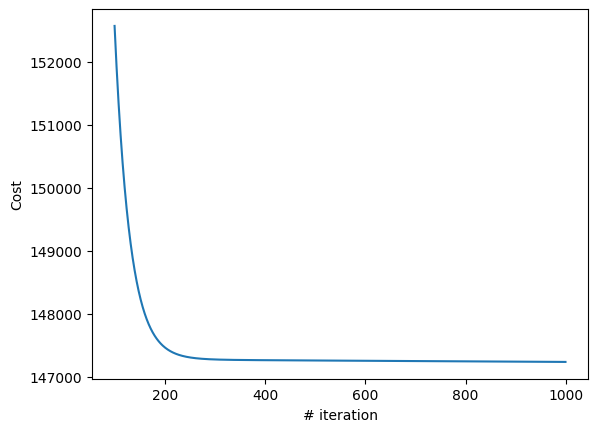

In [19]:
print(len(cost_hist_mv))

plt.plot(100 + np.arange(len(cost_hist_mv[100:])), cost_hist_mv[100:])
plt.xlabel("# iteration")
plt.ylabel("Cost")
plt.show()